<center><img src="graphics/Logolink_OP_VVV_hor_barva_cz.jpg" width="600px"/></center>
<center>ESF projekt Západočeské univerzity v Plzni reg. č. CZ.02.2.69/0.0/0.0/16 015/0002287</center>

# Fourier transform

Spojitá fourierova tranformace

$$ F(u,v)=\int \int_{-\infty}^{\infty} f(x,y) e^{-j2\pi(ux+vy)} dx dy $$

Kde $u$ a $v$ jsou souřadnice ve frekvenčním prostoru a $x$ a $y$ jsou souřadnice v obrazovém prostoru. $F(u,v)$ je 2D spektrum obrazové funkce $F(x,y)$

Diskrétní fourierova transformace

$$ F(u,v)=\sum_{m=-\infty}^{\infty} \sum_{n=-\infty}^{\infty} f[m,n]e^{-j2\pi(umx_o+vny_o)} $$

[Interactive 1D Fourier Transform](http://www.jezzamon.com/fourier/)

[YouTube Video - 2D Fourier Transform](https://www.youtube.com/watch?v=qa1ZxK9Y1Tw)


In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
import skimage.io



Populating the interactive namespace from numpy and matplotlib


Výstup fourierovy transformace je (relativně) souměrný podle středu a má běžně nízké frekvence na okrajích. Pro vizualizaci a lepší představu se kvadranty obrazu přehazují pomocí funkce fftshift()

![fft shift](http://i.stack.imgur.com/I6XDQ.gif)

Text(0.5, 1.0, 'Spektrum')

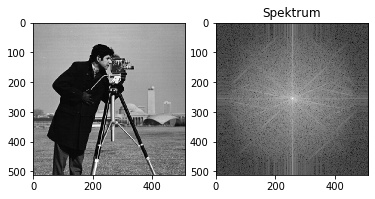

In [2]:
im = data.camera()

ft = np.fft.fft2(im)
ftshift = np.fft.fftshift(ft)
spek = 20*np.log(np.abs(ftshift))

# vizualizace
plt.subplot(121)
plt.imshow(im, cmap='gray')

plt.subplot(122)
plt.imshow(spek, cmap = 'gray')
plt.title('Spektrum')



Example: Show fourier transform of the camera image.

# Filtration

## Lo-pass

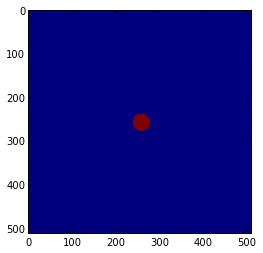

In [15]:
x, y = np.indices(im.shape)
center1 = (256, 256)
radius1 = 20
mask = (x - center1[0])**2 + (y - center1[1])**2 < radius1**2

plt.imshow(mask)

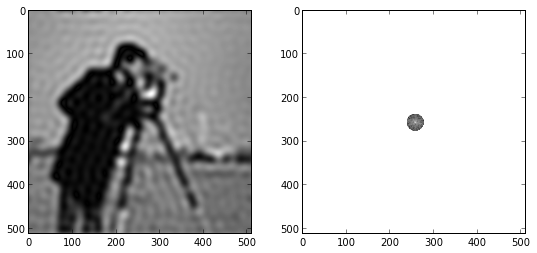

In [16]:
#ftshift * mask
ftshift_mask = ftshift*(mask)
ftishift_back = np.fft.ifftshift(ftshift_mask)
im_back = np.fft.ifft2(ftishift_back)
im_back = np.abs(im_back)

# Visualization
plt.figure(figsize=(9, 4))
plt.subplot(121)
plt.imshow(im_back, cmap='gray')
plt.subplot(122)
plt.imshow(np.log(np.abs(ftshift_mask)), cmap='gray')

## Hi-pass

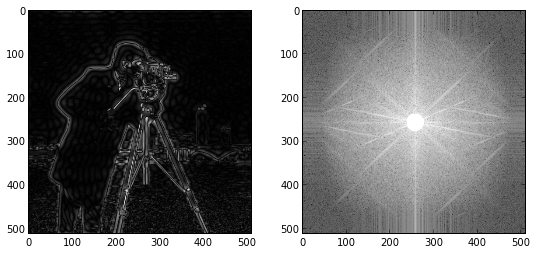

In [17]:
# Vytvoření filtru
x, y = np.indices(im.shape)
center2 = (256, 256)
radius2 = 80
mask2 = (x - center1[0])**2 + (y - center1[1])**2 < radius1**2



# Filtrace a zpětná FT
ftshift_mask = ftshift*(1-mask2)
ftishift_back = np.fft.ifftshift(ftshift_mask)
im_back2 = np.fft.ifft2(ftishift_back)
im_back2 = np.abs(im_back2)

# Visualization
plt.figure(figsize=(9, 4))
plt.subplot(121)
plt.imshow(im_back2, cmap='gray')
plt.subplot(122)

plt.imshow(np.log(np.abs(ftshift_mask)), cmap='gray')

# Convolution theorem

$$ f*g = FT^{-1} \left( FT(f) \cdot FT(G) \right) $$

# Example

Make restauration of the image
http://www.imagemagick.org/Usage/fourier/twigs.jpg

![clown](http://www.imagemagick.org/Usage/fourier/twigs.jpg)



In [33]:
clown = skimage.io.imread('http://www.imagemagick.org/Usage/fourier/clown.jpg')
twigs = skimage.io.imread('http://www.imagemagick.org/Usage/fourier/twigs.jpg')